In [1]:
import os
import sys
import argparse
import numpy as np
from collections import Counter
import xml.etree.ElementTree as et 

# Keras imports
from keras.models import Model
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot
from keras.layers import Input, Dense, Dropout, AlphaDropout, BatchNormalization, Activation

# ML4CVD Imports
from ml4cvd.plots import plot_ecg
from ml4cvd.arguments import parse_args
from ml4cvd.tensor_writer_ukbb import write_tensors
from ml4cvd.recipes import train_multimodal_multitask

# IPython imports
from IPython.display import Image

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/apache_beam/__init__.py:84: UserWarning: Running the Apache Beam SDK on Python 3 is not yet fully supported. You may encounter buggy behavior or missing features.
  'Running the Apache Beam SDK on Python 3 is not yet fully supported. '


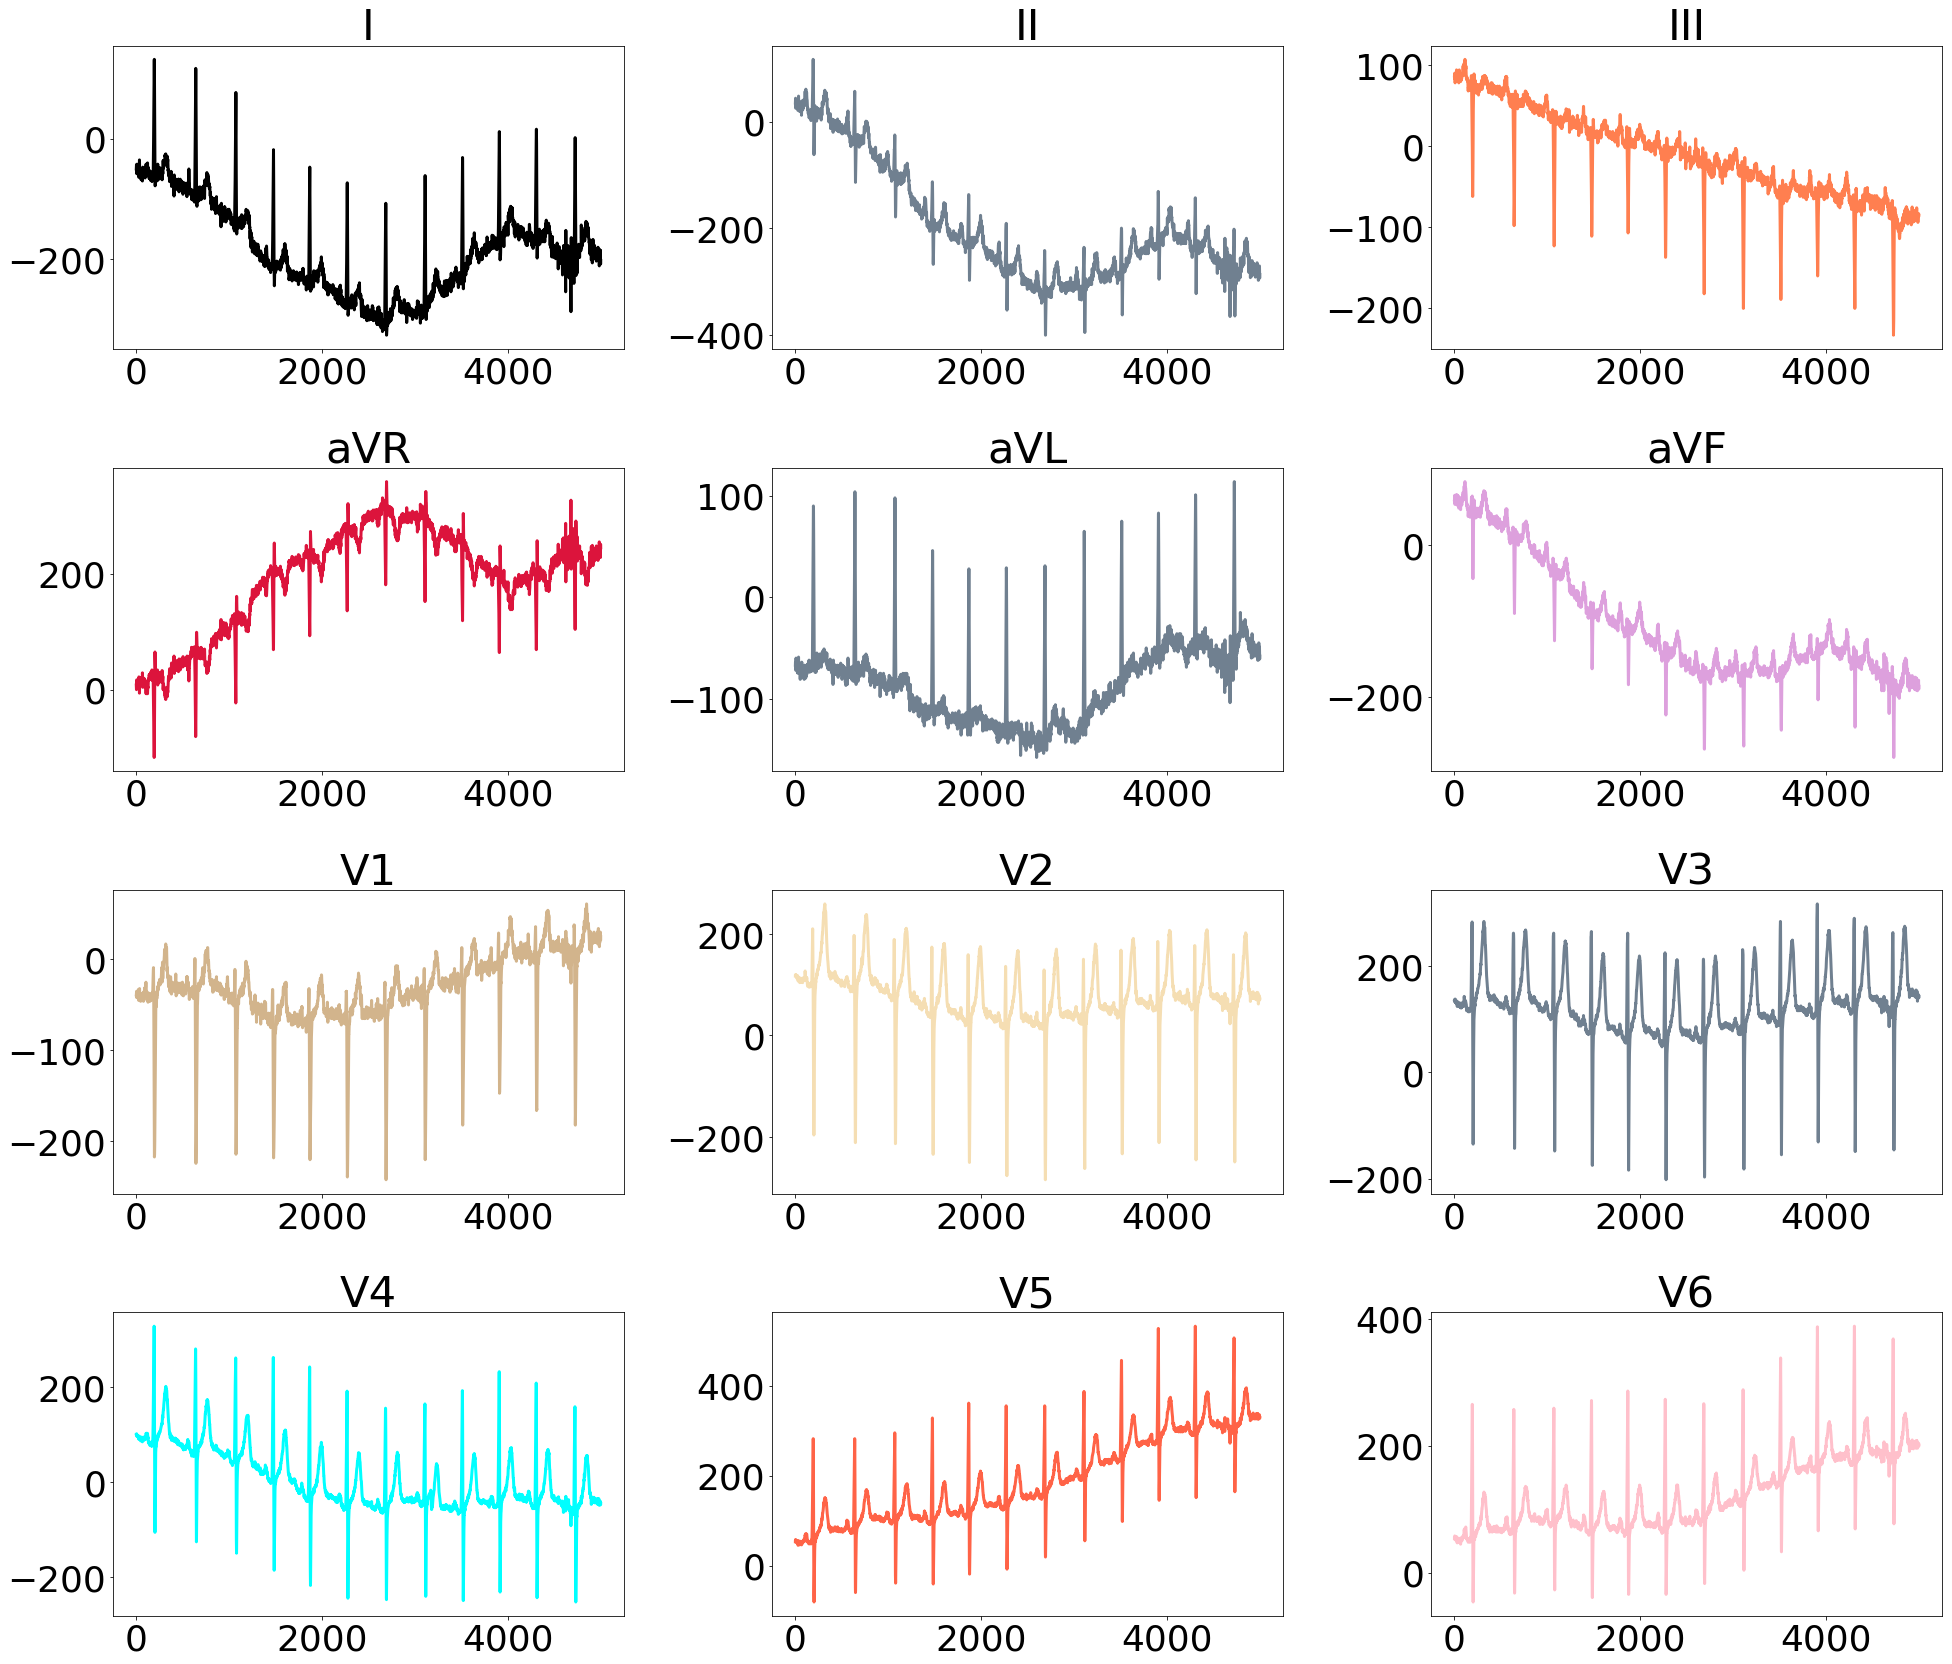

In [2]:
strip_ekgs = {}
ffts = {}
xml_file = '/mnt/disks/data/raw/ecgs/5223300_20205_2_0.xml'

root = et.parse(xml_file).getroot()
for c in root.findall("./StripData/WaveformData"):
    strip_ekgs[c.attrib['lead']] = np.array(list(map(float, c.text.strip().split(','))))
    ffts[c.attrib['lead']] = np.fft.fft(strip_ekgs[c.attrib['lead']])

plot_ecg(strip_ekgs, 'strip')

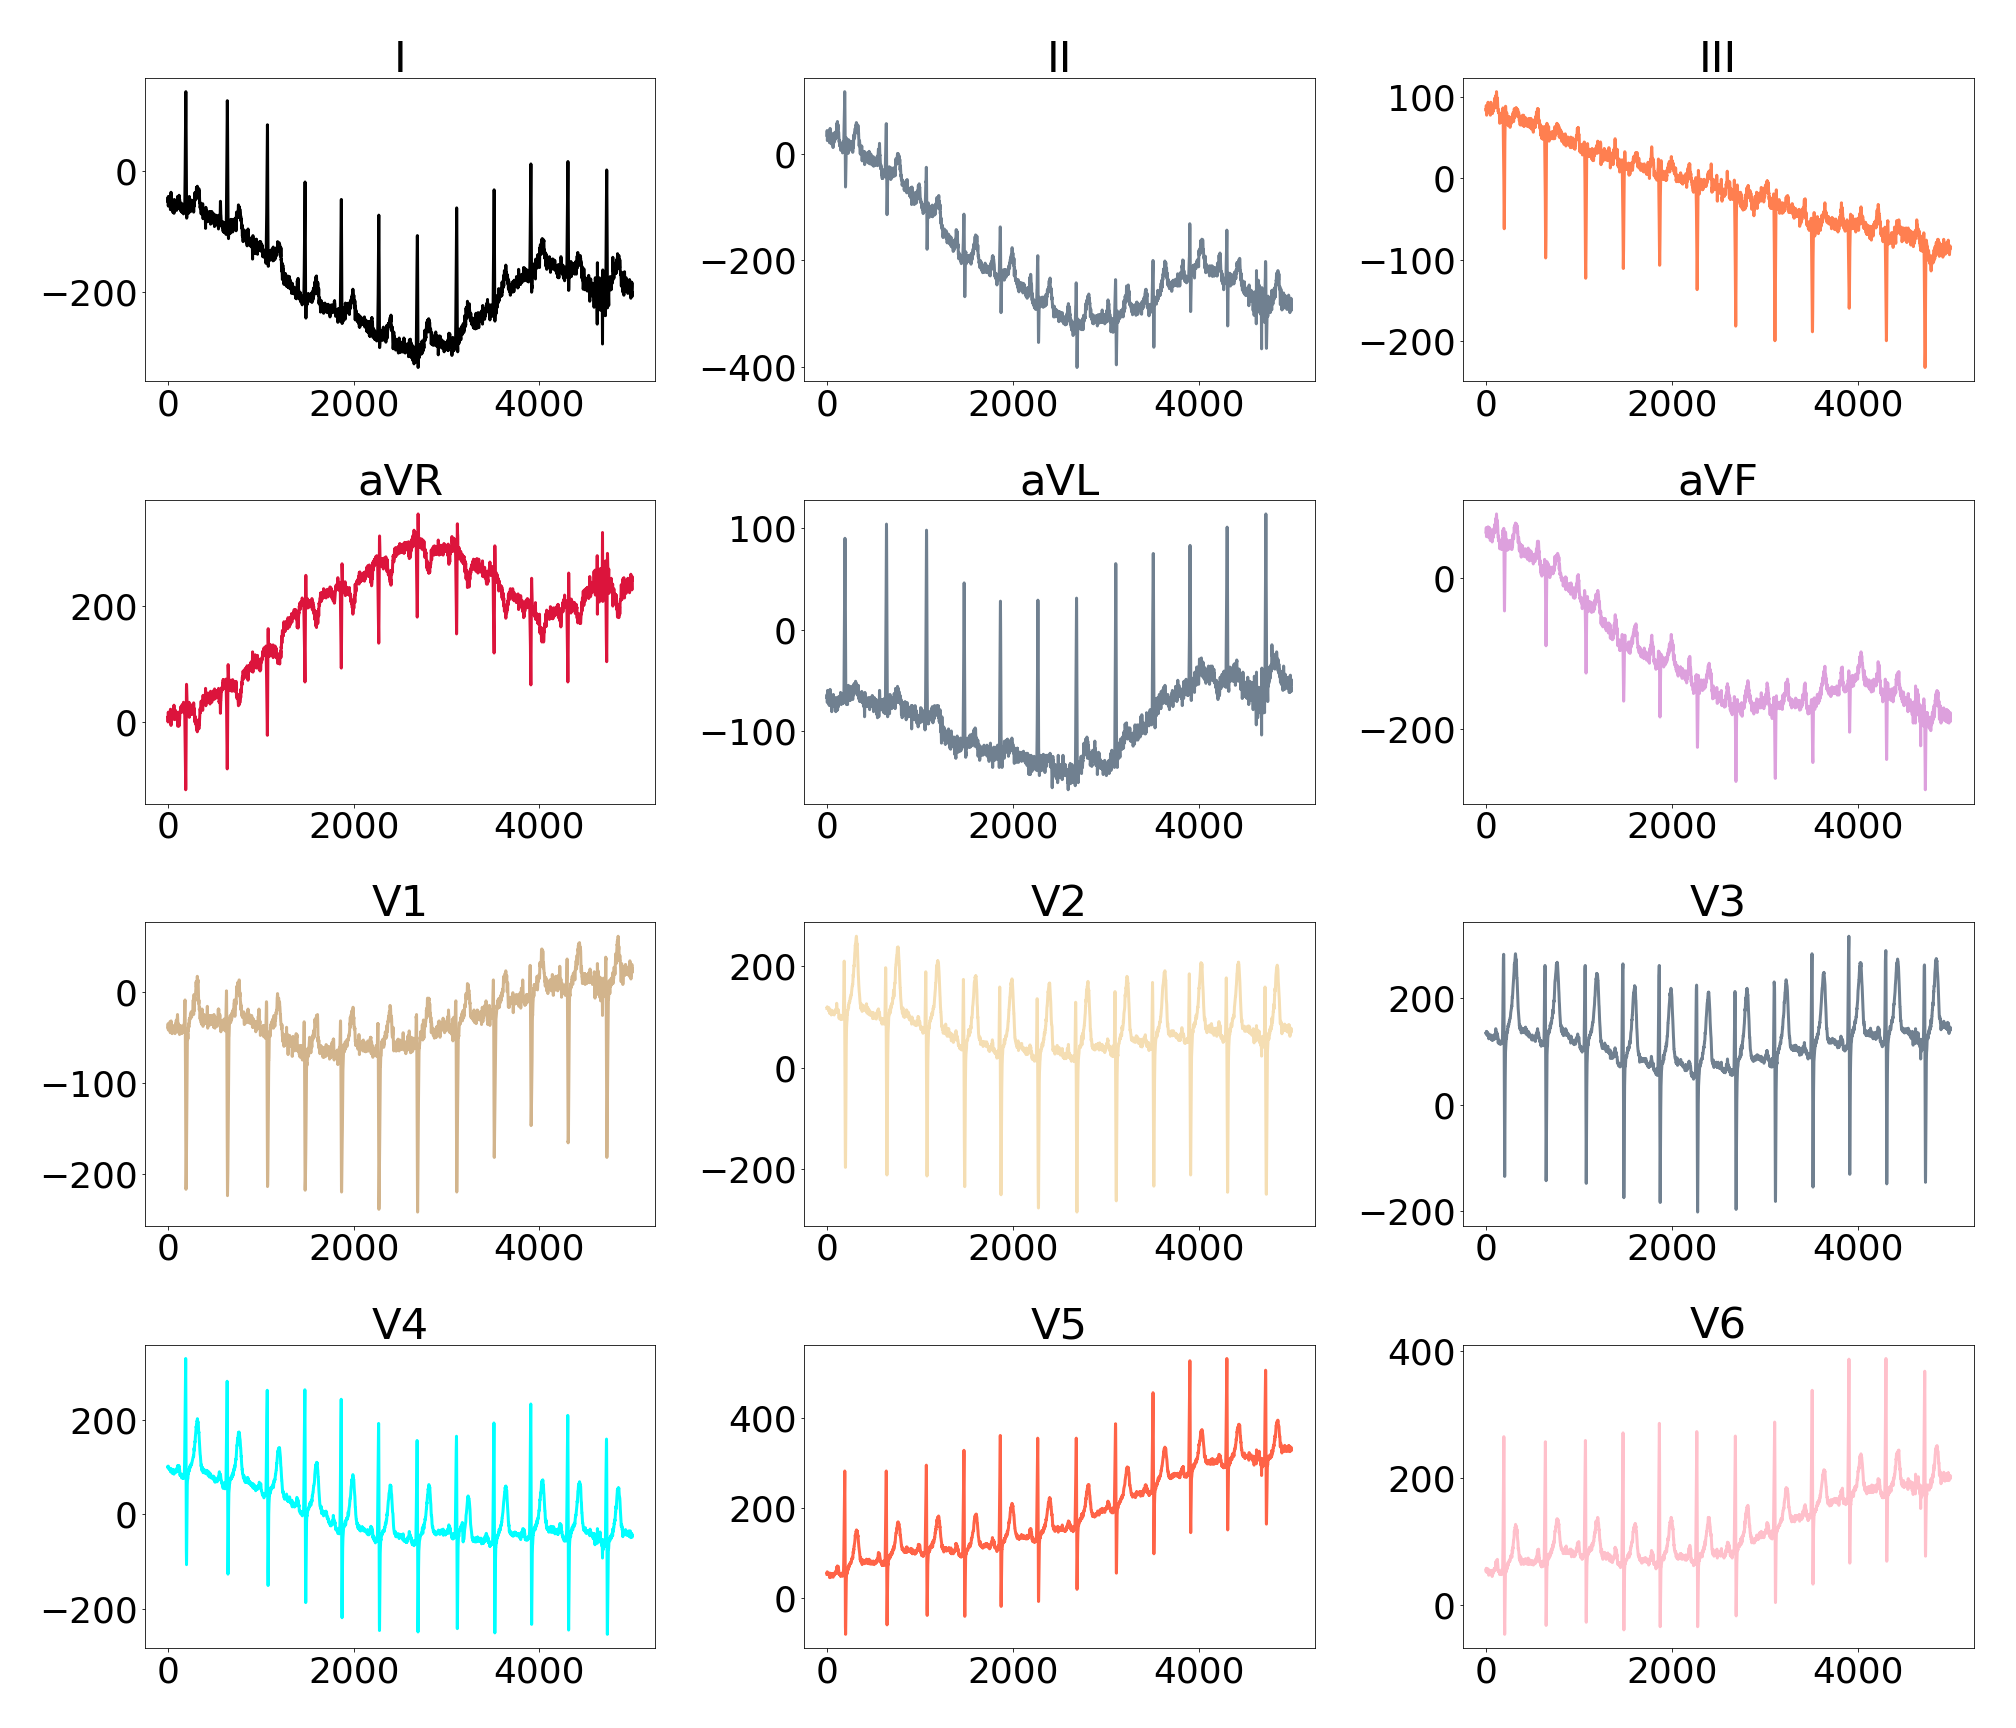

In [3]:
Image('./figures/strip_ecg.png')

In [4]:
for c in root.findall("./RestingECGMeasurements"):
    for child in c:
        print(child.tag, child.text)
        
for d in root.findall("./Interpretation/Diagnosis/DiagnosisText"):
	diagnosis = ''.join(e for e in d.text if e.isalnum() or e == ' ')
	print(diagnosis)

DiagnosisVersion 12SL V21
VentricularRate 73
PQInterval 176
PDuration 90
QRSDuration 86
QTInterval 390
QTCInterval 429
RRInterval 822
PPInterval 820
SokolovLVHIndex None
PAxis 68
RAxis -20
TAxis 40
QTDispersion None
QTDispersionBazett None
QRSNum 12
MeasurementTable 
			
POnset 252
POffset 342
QOnset 428
QOffset 514
TOffset 818
MedianSamples 
			
Normal sinus rhythm
Normal ECG

Arrhythmia results of the fulldisclosure ECG
   QRS Complexes 22


In [ ]:
xml_file = '/mnt/disks/data/raw/ecgs/4856206_20205_2_0.xml'

root = et.parse(xml_file).getroot()
for c in root.findall("./StripData/WaveformData"):
	strip_ekgs[c.attrib['lead']] = np.array(list(map(float, c.text.strip().split(','))))

plot_ecg(strip_ekgs, 'strip_bradycardia')

In [ ]:
Image('./figures/strip_bradycardia_ecg.png')

In [ ]:
root = et.parse(xml_file).getroot()
for d in root.findall("./Interpretation/Diagnosis/DiagnosisText"):
	diagnosis = ''.join(e for e in d.text if e.isalnum() or e == ' ')
	print(diagnosis)

In [ ]:
sys.argv = ['train', 
            '--tensors', '/mnt/disks/ecg-text2/2019-03-30/', 
            '--input_tensors', 'ecg_rest', 
            '--output_tensors', 'ecg_rhythm', 'ecg_normal', 'p-axis', 'p-duration', 
                'p-offset', 'p-onset', 'pp-interval', 'pq-interval', 'q-offset', 'q-onset', 
                'qrs-num', 'qrs-duration', 'r-axis', 'ventricular-rate',
            '--batch_size', '32', 
            '--epochs', '1',  
            '--learning_rate', '0.0001',
            '--model_file', '/mnt/ml4cvd/projects/jamesp/data/models/ecg_regresser.hd5',
            '--training_steps', '20',
            '--inspect_model',
            '--id', 'ecg_regresser']
args = parse_args()
train_multimodal_multitask(args)

In [ ]:
Image('./recipes_output/ecg_regresser/architecture_graph_ecg_regresser.png')

In [ ]:
Image('./recipes_output/ecg_regresser/per_class_roc_ecg_rhythm.png')

In [ ]:
Image('./recipes_output/ecg_regresser/per_class_roc_ecg_normal.png')

In [ ]:
Image('./recipes_output/ecg_regresser/scatter_PPInterval.png')

In [ ]:
Image('./recipes_output/ecg_regresser/scatter_QRSDuration.png')